# Combine Data


In [2]:
# CSV Data를 df으로 바꾸기
import pandas as pd
hypertension_df = pd.read_csv('../Data/Final_HT_data.csv')
diabetes_df = pd.read_csv('../Data/DM_data.csv')

In [3]:
# Data Shape + Features 보기
print("# of Hypertension Features:", hypertension_df.shape[1])
print("# of Hypertension Data Points:", hypertension_df.shape[0])
print("Hypertension Columns:")
print(hypertension_df.columns )

print("\n# of Diabetes Features:", diabetes_df.shape[1])
print("# of Diabetes Data Points:", diabetes_df.shape[0])
print("Diabetes Columns:")
print(diabetes_df.columns)


# of Hypertension Features: 25
# of Hypertension Data Points: 149967
Hypertension Columns:
Index(['HY_YN', 'AGE', 'gender', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'SGOT_ASL', 'SGPT_ALT', 'GAMMA_GTP', 'HMG', 'H_APOP_YN',
       'H_HDISE_YN', 'H_DIABML_YN', 'F_APOP_YN', 'F_HDISE_YN', 'F_HPRT_YN',
       'F_DIABML_YN', 'SMK_STAT', 'SMK_TERM', 'DSQTY', 'EXER_M', 'TM1_DRKQTY',
       'DRNK_HABIT'],
      dtype='object')

# of Diabetes Features: 26
# of Diabetes Data Points: 145718
Diabetes Columns:
Index(['HY_YN', 'SEX', 'AGE_GROUP', 'CTRB_PT_TYPE_CD', 'SCR_CNT', 'T_IN_LOS',
       'T_OUT_LOS', 'HEIGHT', 'WEIGHT', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'HMG', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'F_HPRT_YN',
       'F_APOP_YN', 'F_HDISE_YN', 'F_DIABML_YN', 'F_CANCER_YN', 'SMK_STAT',
       'DRNK_HABIT', 'EXER'],
      dtype='object')


In [4]:
print(hypertension_df.head())
print(diabetes_df.head())

   HY_YN  AGE  gender  WAIST  BP_HIGH  BP_LWST   BLDS  TOT_CHOLE  SGOT_ASL  \
0      0   44       1   86.0    120.0     80.0   75.0      184.0      21.0   
1      0   56       0   84.0    110.0     70.0  151.0      221.0      19.0   
2      0   38       1   78.0    103.0     61.0   82.0      170.0      17.0   
3      0   60       1   88.0    130.0     77.0  153.0      172.0      31.0   
4      0   28       1   92.0    128.0     77.0  101.0      201.0      22.0   

   SGPT_ALT  ...  F_APOP_YN  F_HDISE_YN  F_HPRT_YN  F_DIABML_YN  SMK_STAT  \
0      23.0  ...          0           0          0            1         3   
1      20.0  ...          0           0          0            0         1   
2      12.0  ...          0           0          0            0         3   
3      15.0  ...          0           0          0            0         3   
4      19.0  ...          0           0          0            0         3   

   SMK_TERM  DSQTY  EXER_M  TM1_DRKQTY  DRNK_HABIT  
0         3    

In [5]:
#hypertension_df 전처리

# Change Gender to 1 and 2 (1 is male, 2 is female from now on) & rename the 'gender' column to 'SEX'
hypertension_df['gender'] = hypertension_df['gender'].replace({0: 2, 1: 1})
hypertension_df.rename(columns={'gender': 'SEX'}, inplace=True)

# Rename SGOT_ASL to SGOT_AST in hypertension_df (Same Thing!)
hypertension_df.rename(columns={'SGOT_ASL': 'SGOT_AST'}, inplace=True)

# Map HT.SMK_STAT to DM.SMK_STAT categories
hypertension_df['SMK_STAT'] = hypertension_df['SMK_STAT'].replace({
    1: 1,  # Never smoked
    2: 2,  # Former smoker
    3: 3,  # Current smoker (generalized)
    4: 3,  # Current smoker (various levels generalized to 'current smoker')
    5: 3
})

hypertension_df = hypertension_df.drop(columns=['EXER_M','DRNK_HABIT'])

In [ ]:
#Diabetes_df 전처리

# Drop Unnecessary features for Diabetes
diabetes_df = diabetes_df.drop(columns=['SGOT_AST', 'SMK_STAT', 'HY_YN', 'AGE_GROUP' ])

# Re-map DM.EXER to align with HT.EXER categories
diabetes_df['EXER'] = diabetes_df['EXER'].replace({
    5: 1,  # Nearly daily
    4: 2,  # 5–6 times per week
    3: 2,  # 3–4 times per week
    2: 3,  # 1–2 times per week
    1: 5   # Non-exercising
})

# Map DM drinking frequency to match HT categories
diabetes_df['DRNK_HABIT'] = diabetes_df['DRNK_HABIT'].replace({
    1: 1,  # Nondrinking
    2: 2,  # Less than once per week (mapped from 2–3 times per month)
    3: 3,  # 1–2 times per week
    4: 4,  # 3–4 times per week
    5: 5   # Nearly every day or 5+ times per week
})

In [7]:
common_columns = set(hypertension_df.columns).intersection(diabetes_df.columns)

# Print common columns
print("Number of Common Columns:", len(common_columns))
print("Common Columns between HT and DM:")
for i in common_columns:
    print(i)

Number of Common Columns: 13
Common Columns between HT and DM:
HMG
F_HPRT_YN
BLDS
BP_LWST
SGPT_ALT
BP_HIGH
TOT_CHOLE
SEX
F_APOP_YN
WAIST
F_HDISE_YN
F_DIABML_YN
GAMMA_GTP


In [8]:
# Convert data types to match if necessary
for column in common_columns:
    if hypertension_df[column].dtype != diabetes_df[column].dtype:
        # Convert to a consistent data type (e.g., float) across both datasets
        hypertension_df[column] = hypertension_df[column].astype(float)
        diabetes_df[column] = diabetes_df[column].astype(float)

In [9]:
# Merge the datasets based on the remaining common columns
merged_df = pd.merge(hypertension_df, diabetes_df, on=list(common_columns), how='inner')

In [10]:
# Print the resulting merged DataFrame
print("Shape of Merged DataFrame:", merged_df.shape)
print("Merged DataFrame based on common columns:")
x = 1
for i in merged_df.columns:
    print(x, ' ',  i)
    x = x + 1


Shape of Merged DataFrame: (24872, 32)
Merged DataFrame based on common columns:
1   HY_YN
2   AGE
3   SEX
4   WAIST
5   BP_HIGH
6   BP_LWST
7   BLDS
8   TOT_CHOLE
9   SGOT_AST
10   SGPT_ALT
11   GAMMA_GTP
12   HMG
13   H_APOP_YN
14   H_HDISE_YN
15   H_DIABML_YN
16   F_APOP_YN
17   F_HDISE_YN
18   F_HPRT_YN
19   F_DIABML_YN
20   SMK_STAT
21   SMK_TERM
22   DSQTY
23   TM1_DRKQTY
24   CTRB_PT_TYPE_CD
25   SCR_CNT
26   T_IN_LOS
27   T_OUT_LOS
28   HEIGHT
29   WEIGHT
30   F_CANCER_YN
31   DRNK_HABIT
32   EXER


In [11]:
columns_insurance = [
    'HY_YN',
    'AGE', 
    'BP_HIGH',
    'BP_LWST',
    'BLDS',
    'TOT_CHOLE',
    'HMG',
    'SGOT_AST',
    'SGPT_ALT',
    'GAMMA_GTP',
    'SEX',
    'HEIGHT',
    'WEIGHT',
    'SCR_CNT',
    'T_IN_LOS',
    'T_OUT_LOS',
    'SMK_STAT',
    'DRNK_HABIT',
    'EXER',
    'H_APOP_YN',
    'H_HDISE_YN',
    'H_DIABML_YN'
]

In [12]:
# Filter merged_df to keep only the specified columns for insurance
merged_df_filtered = merged_df[columns_insurance]

# Display the filtered DataFrame
print("Filtered Merged DataFrame:")
print("Shape of Filtered Merged DataFrame:", merged_df_filtered.shape)
print(merged_df_filtered.head())


Filtered Merged DataFrame:
Shape of Filtered Merged DataFrame: (24872, 22)
   HY_YN  AGE  BP_HIGH  BP_LWST  BLDS  TOT_CHOLE   HMG  SGOT_AST  SGPT_ALT  \
0      0   38    103.0     61.0  82.0      170.0  15.0      17.0      12.0   
1      1   46    120.0     80.0  91.0      181.0  15.0      21.0      18.0   
2      0   35    110.0     65.0  88.0      151.0  13.0      50.0      43.0   
3      1   32    130.0     85.0  98.0      180.0  14.5      32.0      30.0   
4      0   50    100.0     70.0  83.0      204.0  11.5      22.0      12.0   

   GAMMA_GTP  ...  WEIGHT  SCR_CNT  T_IN_LOS  T_OUT_LOS  SMK_STAT  DRNK_HABIT  \
0       18.0  ...      65        2         0         27         3           2   
1       28.0  ...      58        5         0          9         2           3   
2       25.0  ...      66        2         0         46         3           2   
3       44.0  ...      70        3         0         14         1           2   
4       10.0  ...      49        3         0       

In [13]:
import numpy as np

print(merged_df_filtered.shape)
# Remove rows with any null values
merged_df_filtered = merged_df_filtered.dropna()

# Check for null values
print("Number of null values per column:")
print(merged_df_filtered.isnull().sum())
print(merged_df_filtered.shape)

(24872, 22)
Number of null values per column:
HY_YN          0
AGE            0
BP_HIGH        0
BP_LWST        0
BLDS           0
TOT_CHOLE      0
HMG            0
SGOT_AST       0
SGPT_ALT       0
GAMMA_GTP      0
SEX            0
HEIGHT         0
WEIGHT         0
SCR_CNT        0
T_IN_LOS       0
T_OUT_LOS      0
SMK_STAT       0
DRNK_HABIT     0
EXER           0
H_APOP_YN      0
H_HDISE_YN     0
H_DIABML_YN    0
dtype: int64
(24867, 22)


In [14]:
# Check for infinite values
print("\nNumber of infinite values per column:")
print(np.isinf(merged_df_filtered).sum())


Number of infinite values per column:
HY_YN          0
AGE            0
BP_HIGH        0
BP_LWST        0
BLDS           0
TOT_CHOLE      0
HMG            0
SGOT_AST       0
SGPT_ALT       0
GAMMA_GTP      0
SEX            0
HEIGHT         0
WEIGHT         0
SCR_CNT        0
T_IN_LOS       0
T_OUT_LOS      0
SMK_STAT       0
DRNK_HABIT     0
EXER           0
H_APOP_YN      0
H_HDISE_YN     0
H_DIABML_YN    0
dtype: int64


In [15]:
# Check for duplicate data
duplicates = merged_df.duplicated()
if duplicates.any():
    merged_df = merged_df.drop_duplicates()
    print("Duplicates found and removed.")
else:
    print("No duplicates found in the merged DataFrame.")

No duplicates found in the merged DataFrame.


In [16]:
ht_yn_counts = merged_df['HY_YN'].value_counts()

# Display the counts
print("Counts of HT_YN values in merged_df_filtered:")
print(ht_yn_counts)

Counts of HT_YN values in merged_df_filtered:
HY_YN
0    22959
1     1913
Name: count, dtype: int64


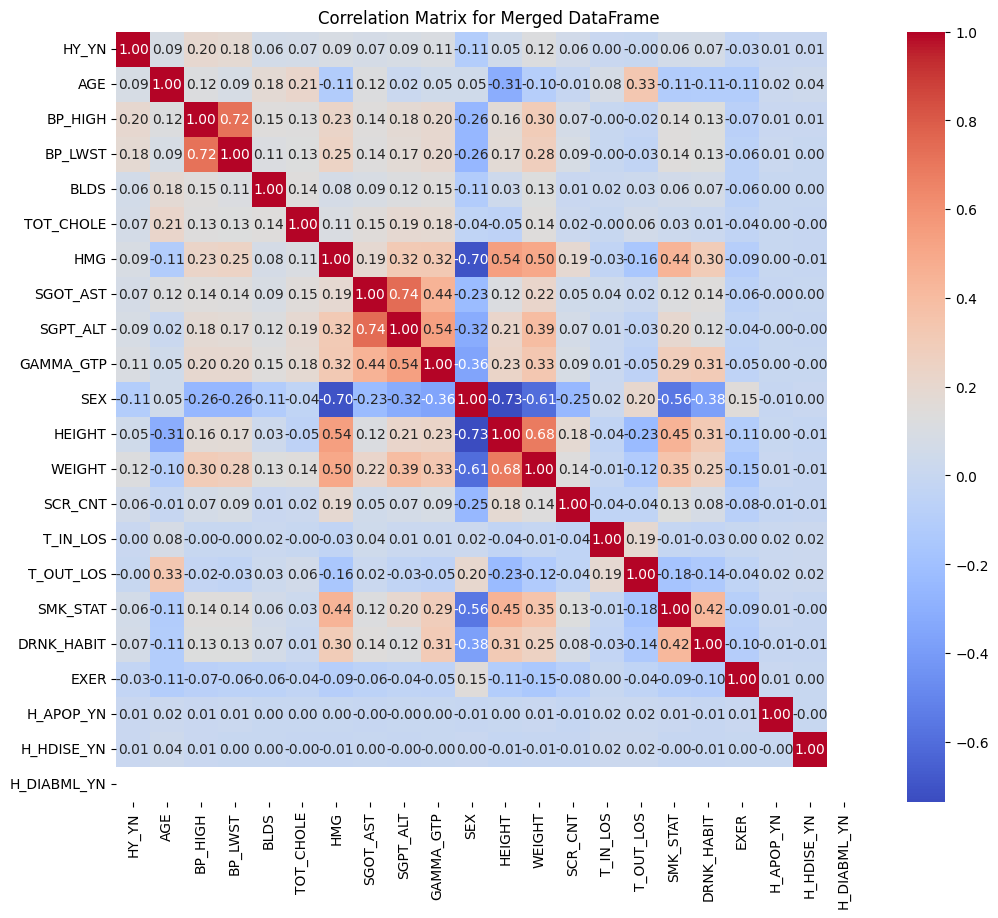

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = merged_df_filtered.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Merged DataFrame")
plt.show()


In [18]:
# Extract pairs of highly correlated features (|correlation| > 0.7)
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Only check upper triangle
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:  # Check for high correlation
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

# Display highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")


Highly Correlated Feature Pairs (|correlation| > 0.7):
BP_HIGH - BP_LWST: 0.72
HMG - SEX: -0.70
SGOT_AST - SGPT_ALT: 0.74
SEX - HEIGHT: -0.73


In [19]:
# Issue 1: Replace HEIGHT and WEIGHT with BMI
merged_df_filtered['BMI'] = merged_df_filtered['WEIGHT'] / ((merged_df_filtered['HEIGHT'] / 100) ** 2)
# Drop the original HEIGHT and WEIGHT columns as they are now replaced by BMI
merged_df_filtered = merged_df_filtered.drop(columns=['WEIGHT', 'HEIGHT'])

# Issue 2: Replace SGPT_ALT and SGOT_AST with an average liver enzyme feature
merged_df_filtered['Liver_Enzyme_Avg'] = (merged_df_filtered['SGPT_ALT'] + merged_df_filtered['SGOT_AST']) / 2
# Drop the original liver enzyme columns
merged_df_filtered = merged_df_filtered.drop(columns=['SGPT_ALT', 'SGOT_AST'])

# Issue 3: Replace BP_HIGH and BP_LWST with Mean Arterial Pressure (MAP)
merged_df_filtered['MAP'] = (merged_df_filtered['BP_HIGH'] + 2 * merged_df_filtered['BP_LWST']) / 3
# Drop the original blood pressure columns
merged_df_filtered = merged_df_filtered.drop(columns=['BP_HIGH', 'BP_LWST'])

# Issue 4: DROP HMG
merged_df_filtered = merged_df_filtered.drop(columns=['HMG'])

# Check the shape and columns of the updated DataFrame
print("Updated DataFrame after addressing multicollinearity issues:")
print("Shape:", merged_df_filtered.shape)
print("Columns:", merged_df_filtered.columns)


Updated DataFrame after addressing multicollinearity issues:
Shape: (24867, 18)
Columns: Index(['HY_YN', 'AGE', 'BLDS', 'TOT_CHOLE', 'GAMMA_GTP', 'SEX', 'SCR_CNT',
       'T_IN_LOS', 'T_OUT_LOS', 'SMK_STAT', 'DRNK_HABIT', 'EXER', 'H_APOP_YN',
       'H_HDISE_YN', 'H_DIABML_YN', 'BMI', 'Liver_Enzyme_Avg', 'MAP'],
      dtype='object')


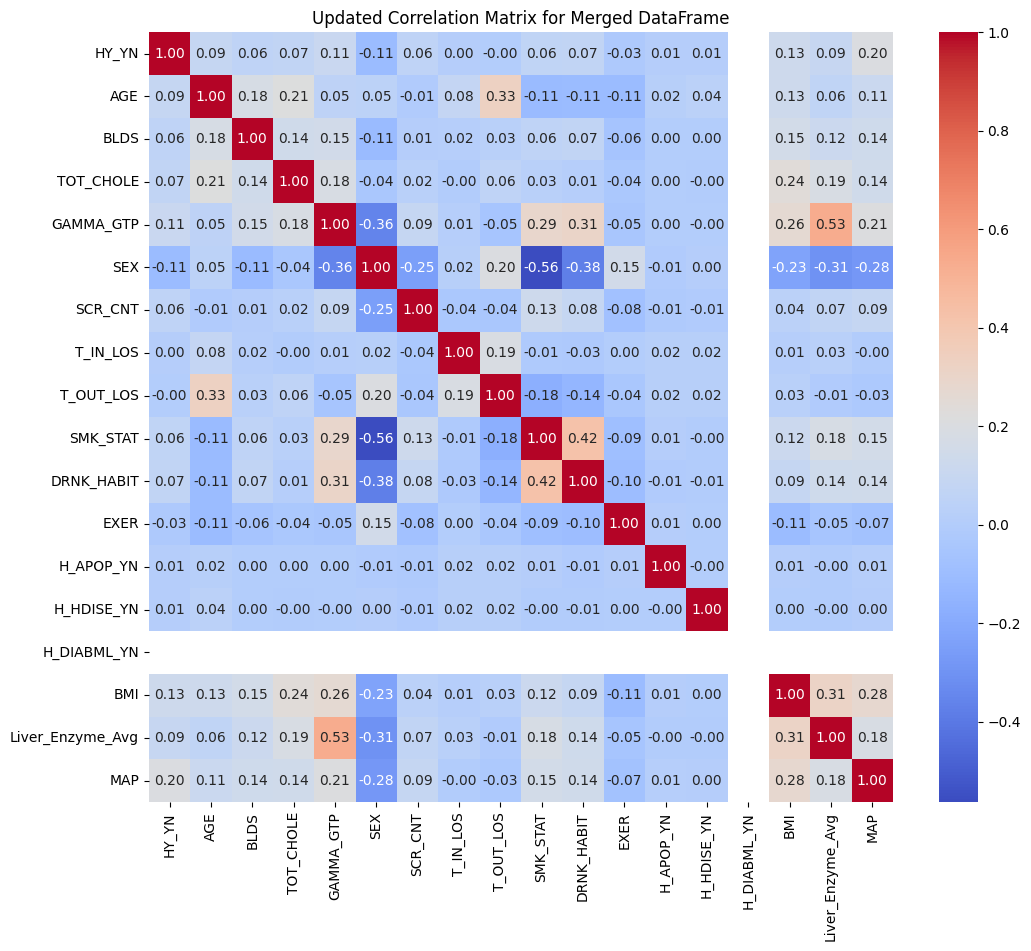


Highly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate the correlation matrix for the updated DataFrame
correlation_matrix = merged_df_filtered.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation Matrix for Merged DataFrame")
plt.show()

# Optionally, print pairs with high collinearity after the adjustments
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print("\nHighly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")


In [21]:
# Export the DataFrame to a CSV file
merged_df_filtered.to_csv('filtered_merged_data.csv', index=False)
print("DataFrame successfully exported to 'filtered_merged_data.csv'")


DataFrame successfully exported to 'filtered_merged_data.csv'


In [22]:
# Print columns
for i in merged_df_filtered: print(i)

HY_YN
AGE
BLDS
TOT_CHOLE
GAMMA_GTP
SEX
SCR_CNT
T_IN_LOS
T_OUT_LOS
SMK_STAT
DRNK_HABIT
EXER
H_APOP_YN
H_HDISE_YN
H_DIABML_YN
BMI
Liver_Enzyme_Avg
MAP


In [23]:
import pandas as pd
# Define the list of categorical columns
categorical_columns = ['SEX', 'SMK_STAT', 'DRNK_HABIT', 'EXER', 'H_APOP_YN', 'H_HDISE_YN', 'H_DIABML_YN']
# Perform one-hot encoding on the categorical columns
merged_df_encoded = pd.get_dummies(merged_df_filtered, columns=categorical_columns, drop_first=True)
# Display the new DataFrame structure
print("Shape of DataFrame after One-Hot Encoding:", merged_df_encoded.shape)
print(merged_df_encoded.head())

Shape of DataFrame after One-Hot Encoding: (24867, 24)
   HY_YN  AGE  BLDS  TOT_CHOLE  GAMMA_GTP  SCR_CNT  T_IN_LOS  T_OUT_LOS  \
0      0   38  82.0      170.0       18.0        2         0         27   
1      1   46  91.0      181.0       28.0        5         0          9   
2      0   35  88.0      151.0       25.0        2         0         46   
3      1   32  98.0      180.0       44.0        3         0         14   
4      0   50  83.0      204.0       10.0        3         0         36   

         BMI  Liver_Enzyme_Avg  ...  SMK_STAT_3  DRNK_HABIT_2  DRNK_HABIT_3  \
0  20.747550              14.5  ...        True          True         False   
1  21.829952              19.5  ...       False         False          True   
2  24.242424              46.5  ...        True          True         False   
3  23.661439              31.0  ...       False          True         False   
4  22.071078              17.0  ...       False         False         False   

   DRNK_HABIT_4  DR

Hypertension Counts:
HY_YN
0    22956
1     1911
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1423ba9e810>,
 [Text(-0.26299821627971354, -1.0680973449239959, '0'),
  Text(0.2629983162822031, 1.068097320300321, '1')],
 [Text(-0.14345357251620736, -0.5825985517767249, '92.3%'),
  Text(0.14345362706301984, 0.5825985383456296, '7.7%')])

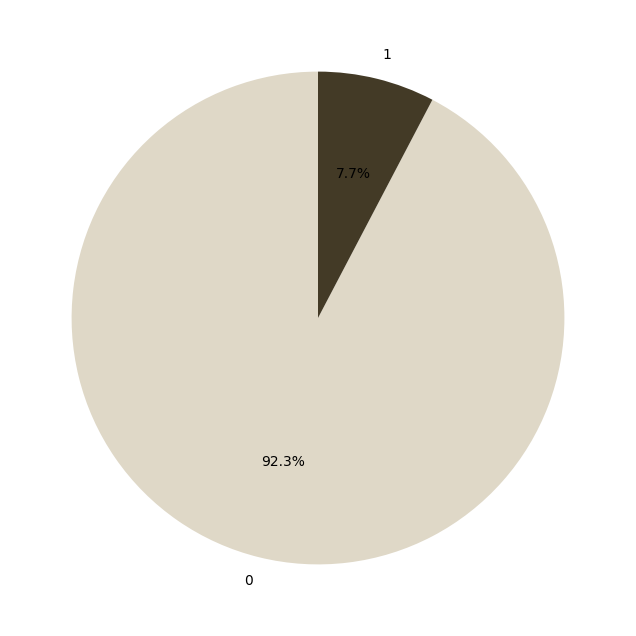

In [24]:
# count number of patients with hypertension
hypertension_count = merged_df_encoded['HY_YN'].value_counts()
print("Hypertension Counts:")
print(hypertension_count)

# draw pie chart
plt.figure(figsize=(8, 8))
plt.pie(hypertension_count, labels=hypertension_count.index, autopct='%1.1f%%', startangle=90, colors=['#dfd8c7', '#433a26'])


##

In [25]:
# Export the DataFrame to a CSV file
merged_df_encoded.to_csv('filtered_merged_encoded_data.csv', index=False)

In [26]:
final_df = pd.read_csv('../Data/GAN2_1_dataset.csv')

## Logistic Regression (GAN)


In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = final_df.drop(columns=['HY_YN'])  # Drop target variable from features
y = final_df['HY_YN']  # Define target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)


Logistic Regression Model Evaluation:
Accuracy: 0.8799009492364837

Confusion Matrix:
 [[4162  429]
 [ 444 2234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      4591
           1       0.84      0.83      0.84      2678

    accuracy                           0.88      7269
   macro avg       0.87      0.87      0.87      7269
weighted avg       0.88      0.88      0.88      7269

ROC-AUC Score: 0.9363746063547067


In [28]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_model.coef_[0]
})

# Sort by absolute importance for easier interpretation
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance[['Feature', 'Importance']])


# calculate r^2 value of log regression model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)



Feature Importance:
              Feature  Importance
21       H_APOP_YN_1  -41.918206
22      H_HDISE_YN_1   18.282752
12        SMK_STAT_2   -1.175847
0                AGE   -1.094031
9                MAP    0.987063
18            EXER_2   -0.955950
10             SEX_2   -0.636455
14      DRNK_HABIT_2   -0.373725
13        SMK_STAT_3   -0.305931
16      DRNK_HABIT_4   -0.236934
19            EXER_3   -0.189479
8   Liver_Enzyme_Avg    0.180941
15      DRNK_HABIT_3   -0.153182
2          TOT_CHOLE    0.143764
17      DRNK_HABIT_5   -0.143261
11        SMK_STAT_1   -0.114503
7                BMI    0.093412
4            SCR_CNT    0.064187
3          GAMMA_GTP   -0.055970
20            EXER_5   -0.055802
6          T_OUT_LOS   -0.041521
1               BLDS   -0.039198
5           T_IN_LOS   -0.008619
R^2 Score: 0.48385580516089133


C:\Users\James\AppData\Local\Temp\ipykernel_25132\3597253738.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


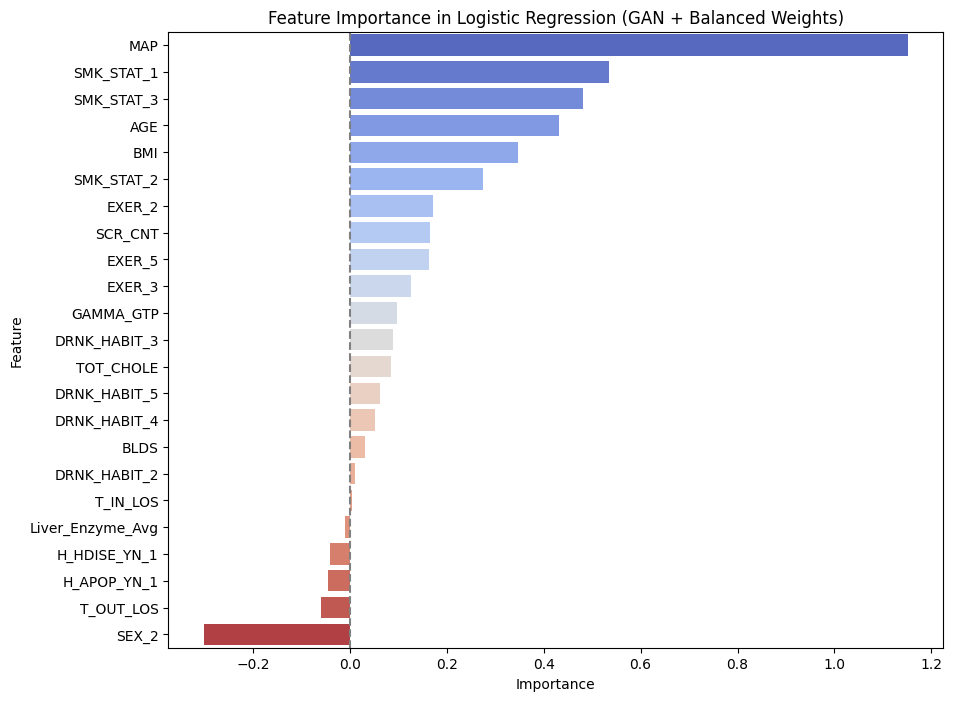

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data is already in a DataFrame named `feature_importance_df`
# Sort features by importance for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': ['MAP', 'SMK_STAT_1', 'SMK_STAT_3', 'AGE', 'BMI', 'SEX_2', 'SMK_STAT_2', 'EXER_2', 
                'SCR_CNT', 'EXER_5', 'EXER_3', 'GAMMA_GTP', 'DRNK_HABIT_3', 'TOT_CHOLE', 'DRNK_HABIT_5', 
                'T_OUT_LOS', 'DRNK_HABIT_4', 'H_APOP_YN_1', 'H_HDISE_YN_1', 'BLDS', 'DRNK_HABIT_2', 
                'Liver_Enzyme_Avg', 'T_IN_LOS'],
    'Importance': [1.152132, 0.535164, 0.481705, 0.432091, 0.346257, -0.301535, 0.275665, 0.172331, 
                   0.164877, 0.164453, 0.126504, 0.097998, 0.088830, 0.085273, 0.062361, -0.060400, 
                   0.052021, -0.044410, -0.040690, 0.031475, 0.011358, -0.008990, 0.003960]
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='coolwarm'
)
plt.title("Feature Importance in Logistic Regression (GAN + Balanced Weights)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.axvline(x=0, color='grey', linestyle='--')  # Line at zero for positive/negative distinction
plt.show()


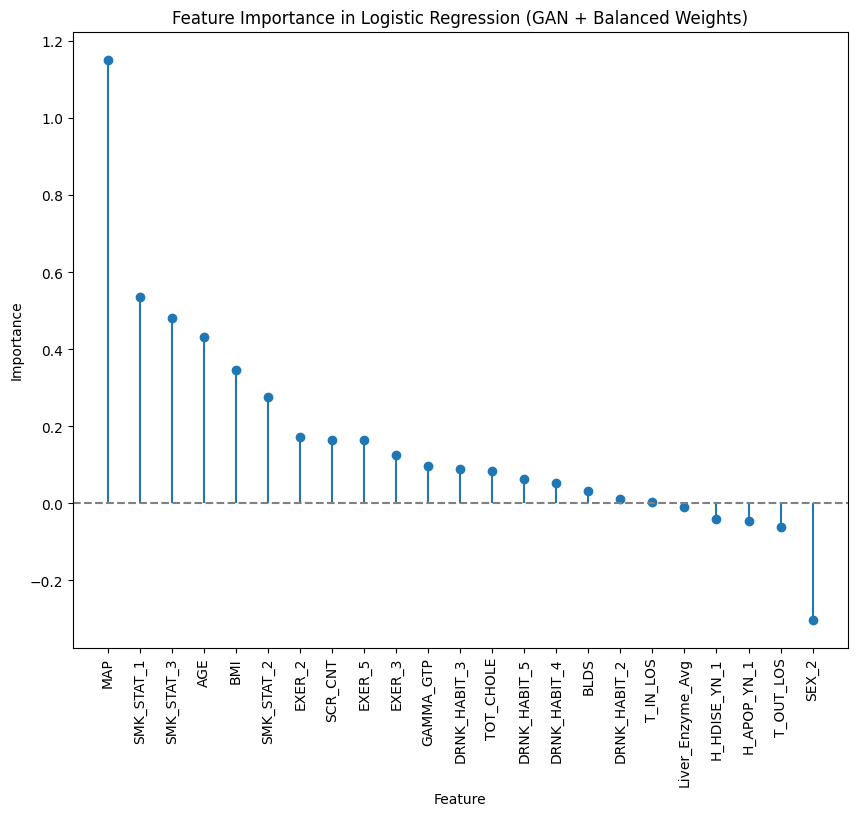

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Feature Importance (Assuming it's in a DataFrame as per your example)
feature_importance_df = pd.DataFrame({
    'Feature': ['MAP', 'SMK_STAT_1', 'SMK_STAT_3', 'AGE', 'BMI', 'SEX_2', 'SMK_STAT_2', 'EXER_2', 
                'SCR_CNT', 'EXER_5', 'EXER_3', 'GAMMA_GTP', 'DRNK_HABIT_3', 'TOT_CHOLE', 'DRNK_HABIT_5', 
                'T_OUT_LOS', 'DRNK_HABIT_4', 'H_APOP_YN_1', 'H_HDISE_YN_1', 'BLDS', 'DRNK_HABIT_2', 
                'Liver_Enzyme_Avg', 'T_IN_LOS'],
    'Importance': [1.152132, 0.535164, 0.481705, 0.432091, 0.346257, -0.301535, 0.275665, 0.172331, 
                   0.164877, 0.164453, 0.126504, 0.097998, 0.088830, 0.085273, 0.062361, -0.060400, 
                   0.052021, -0.044410, -0.040690, 0.031475, 0.011358, -0.008990, 0.003960]
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Lollipop Chart
plt.figure(figsize=(10, 8))
plt.stem(
    feature_importance_df['Feature'], 
    feature_importance_df['Importance'], 
    basefmt=" "  # No baseline
)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression (GAN + Balanced Weights)")
plt.axhline(y=0, color='grey', linestyle='--')  # Line at zero for positive/negative distinction
plt.show()


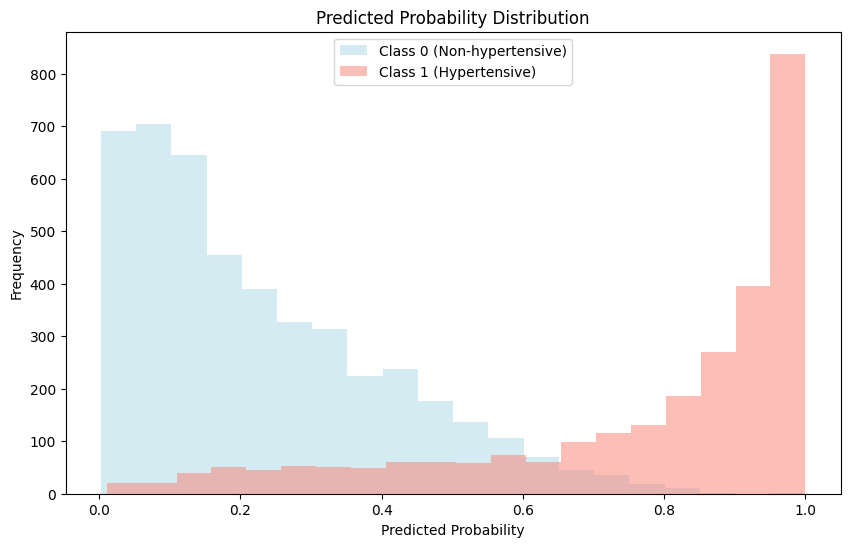

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label="Class 0 (Non-hypertensive)", color="lightblue")
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label="Class 1 (Hypertensive)", color="salmon")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probability Distribution")
plt.legend(loc="upper center")
plt.show()


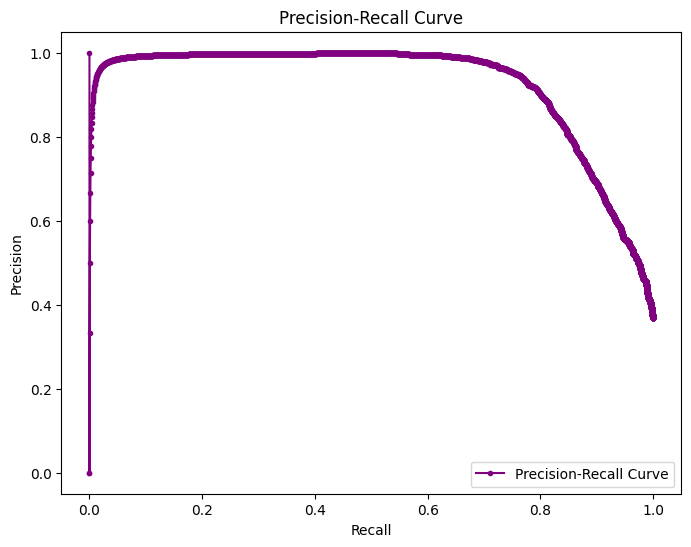

In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='purple', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## Logistic Regression (Smote)


Class distribution before SMOTE: HY_YN
0    18364
1     1529
Name: count, dtype: int64
Class distribution after SMOTE: HY_YN
0    18364
1    18364
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTE):
Accuracy: 0.8801769199839163

Confusion Matrix:
 [[4307  285]
 [ 311   71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4592
           1       0.20      0.19      0.19       382

    accuracy                           0.88      4974
   macro avg       0.57      0.56      0.56      4974
weighted avg       0.88      0.88      0.88      4974

ROC-AUC Score: 0.7034222960030647


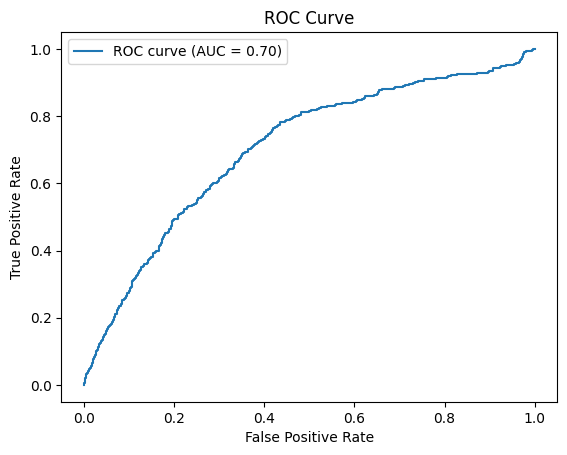

In [33]:
    # Import necessary libraries
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    from imblearn.over_sampling import SMOTE  # Import SMOTE
    import matplotlib.pyplot as plt

    # Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
    X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
    y = merged_df_encoded['HY_YN']  # Define target variable

    # Split the data into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check the class distribution after SMOTE
    print("Class distribution before SMOTE:", y_train.value_counts())
    print("Class distribution after SMOTE:", y_train_resampled.value_counts())

    # Define and train the logistic regression model
    logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
    logistic_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = logistic_model.predict(X_test)
    y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Display the evaluation results
    print("\nLogistic Regression Model Evaluation (with SMOTE):")
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


Logistic Regression Model Evaluation (with Borderline-SMOTE):
Accuracy: 0.6855649376759148

Confusion Matrix:
 [[3148 1444]
 [ 120  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80      4592
           1       0.15      0.69      0.25       382

    accuracy                           0.69      4974
   macro avg       0.56      0.69      0.53      4974
weighted avg       0.90      0.69      0.76      4974

ROC-AUC Score: 0.7576835197110386


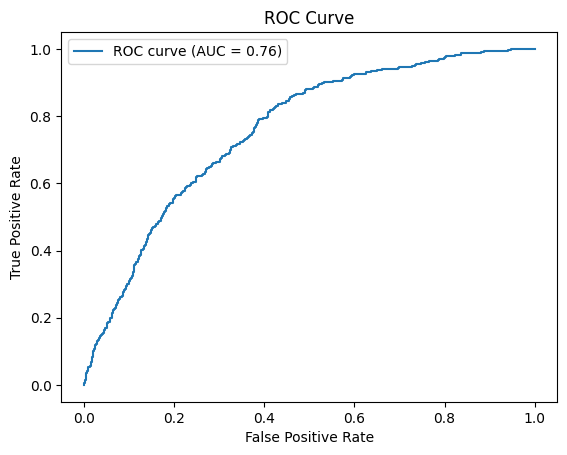

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

# Load your preprocessed data (assuming `merged_df_encoded` is already encoded and cleaned)
X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = merged_df_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

# Apply Borderline-SMOTE on the scaled training data
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_scaled, y_train)

# Define and train the logistic regression model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with Borderline-SMOTE):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Logistic Regression (SmoTeen + ENN)


Class distribution before SMOTEENN: HY_YN
0    18364
1     1529
Name: count, dtype: int64
Class distribution after SMOTEENN: HY_YN
1    18075
0    11956
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTEENN):
Accuracy: 0.839967832730197

Confusion Matrix:
 [[4044  548]
 [ 248  134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      4592
           1       0.20      0.35      0.25       382

    accuracy                           0.84      4974
   macro avg       0.57      0.62      0.58      4974
weighted avg       0.88      0.84      0.86      4974

ROC-AUC Score: 0.7183726079500884


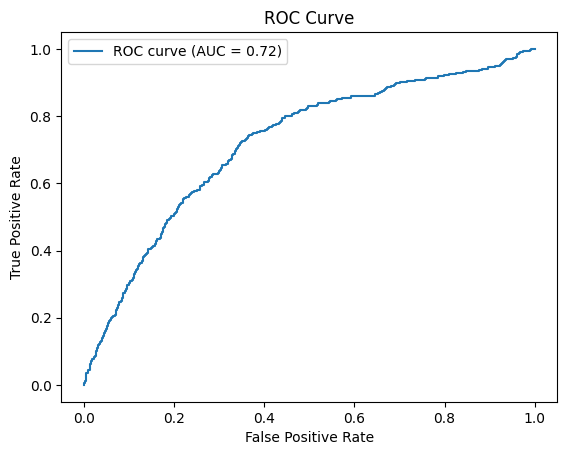

In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN  # Import SMOTEENN
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = merged_df_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Check the class distribution after SMOTEENN
print("Class distribution before SMOTEENN:", y_train.value_counts())
print("Class distribution after SMOTEENN:", y_train_resampled.value_counts())

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with SMOTEENN):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Logistic Regression (Logistic + Hyperparameter tuning)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters from Grid Search: {'C': 100, 'solver': 'liblinear'}

Logistic Regression Model Evaluation (after Hyperparameter Tuning):
Accuracy: 0.8621543541064796

Confusion Matrix:
 [[3942  649]
 [ 353 2325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      4591
           1       0.78      0.87      0.82      2678

    accuracy                           0.86      7269
   macro avg       0.85      0.86      0.85      7269
weighted avg       0.87      0.86      0.86      7269

ROC-AUC Score: 0.9388034582061306


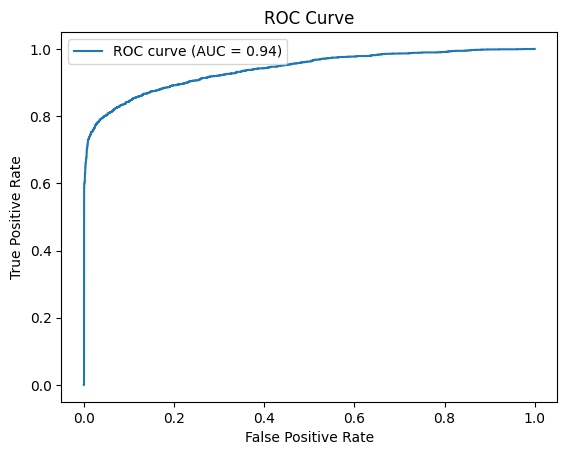

In [36]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN  # For resampling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = final_df.drop(columns=['HY_YN'])  # Drop target variable from features
y = final_df['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Set up the parameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Regularization strengths to try
    'solver': ['liblinear', 'saga', 'newton-cg'] # Solvers to try
}

# Initialize the logistic regression model with class weight balancing
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters from Grid Search:", best_params)

# Evaluate the tuned model on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (after Hyperparameter Tuning):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Random Forest

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced_subsample'}

Random Forest Model Evaluation (after Randomized Search Tuning):
Accuracy: 0.9352042921997523

Confusion Matrix:
 [[4445  146]
 [ 325 2353]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4591
           1       0.94      0.88      0.91      2678

    accuracy                           0.94      7269
   macro avg       0.94      0.92      0.93      7269
weighted avg       0.94      0.94      0.93      7269

ROC-AUC Score: 0.9652501427851257


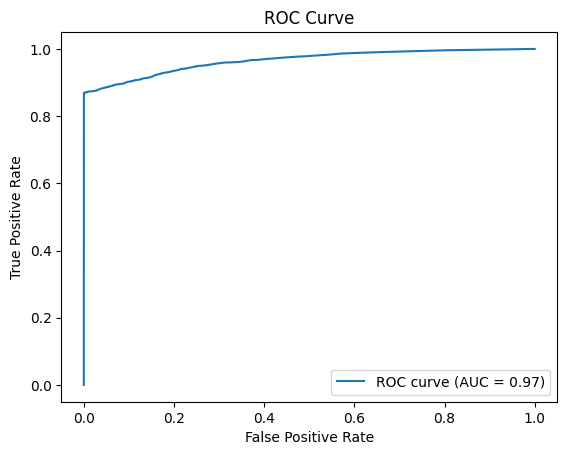

In [37]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN  # For resampling
import matplotlib.pyplot as plt
import numpy as np

# Define features (X) and target (y)
X = final_df.drop(columns=['HY_YN'])  # Drop target variable from features
y = final_df['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Set up the parameter distribution for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 301, 50),       # Reduced range of number of trees
    'max_depth': [10, 20, 30, None],               # Maximum depth options
    'min_samples_split': [2, 5, 10],               # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required at a leaf node
    'class_weight': ['balanced', 'balanced_subsample']  # Class weight options
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_dist, 
                                   n_iter=20,  # Number of random combinations to try
                                   cv=5,       # 5-fold cross-validation
                                   scoring='f1', 
                                   n_jobs=-1, 
                                   random_state=42, 
                                   verbose=1)

# Fit RandomizedSearchCV to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Parameters from Randomized Search:", best_params)

# Evaluate the tuned model on the test set
y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nRandom Forest Model Evaluation (after Randomized Search Tuning):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Original feature count: 23, Reduced feature count: 19

Logistic Regression Model Evaluation with PCA:
Accuracy: 0.821295914156005

Confusion Matrix:
 [[3618  973]
 [ 326 2352]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      4591
           1       0.71      0.88      0.78      2678

    accuracy                           0.82      7269
   macro avg       0.81      0.83      0.82      7269
weighted avg       0.84      0.82      0.82      7269

ROC-AUC Score: 0.9260017610843307


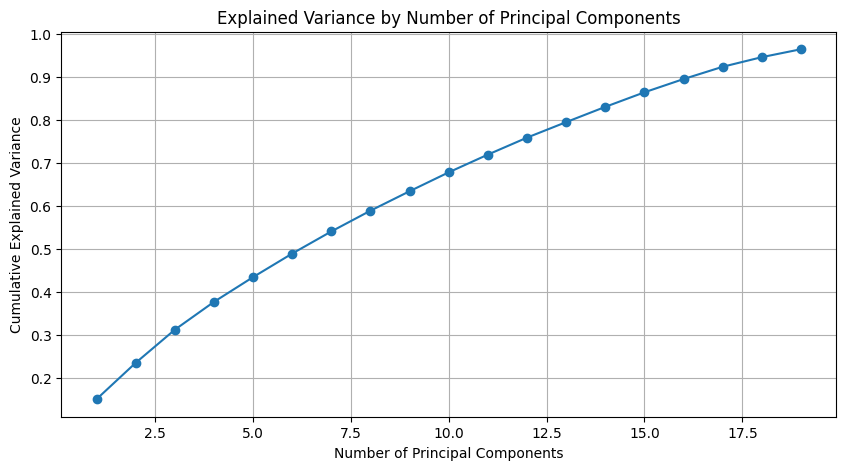

In [38]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import BorderlineSMOTE

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Ensure features have mean = 0 and variance = 1

# Step 2: Apply PCA for dimensionality reduction
# Set `n_components` to keep enough components to retain around 95% of the variance
pca = PCA(n_components=0.95)  # Adjust this value to control the amount of variance retained
X_pca = pca.fit_transform(X_scaled)
print(f"Original feature count: {X.shape[1]}, Reduced feature count: {X_pca.shape[1]}")

# Step 3: Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Apply Borderline-SMOTE for resampling the training data
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

# Step 5: Train a logistic regression model with class weighting
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on the test set and evaluate the model
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nLogistic Regression Model Evaluation with PCA:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Optional: Plot explained variance to decide on number of components
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Principal Components")
plt.grid()
plt.show()


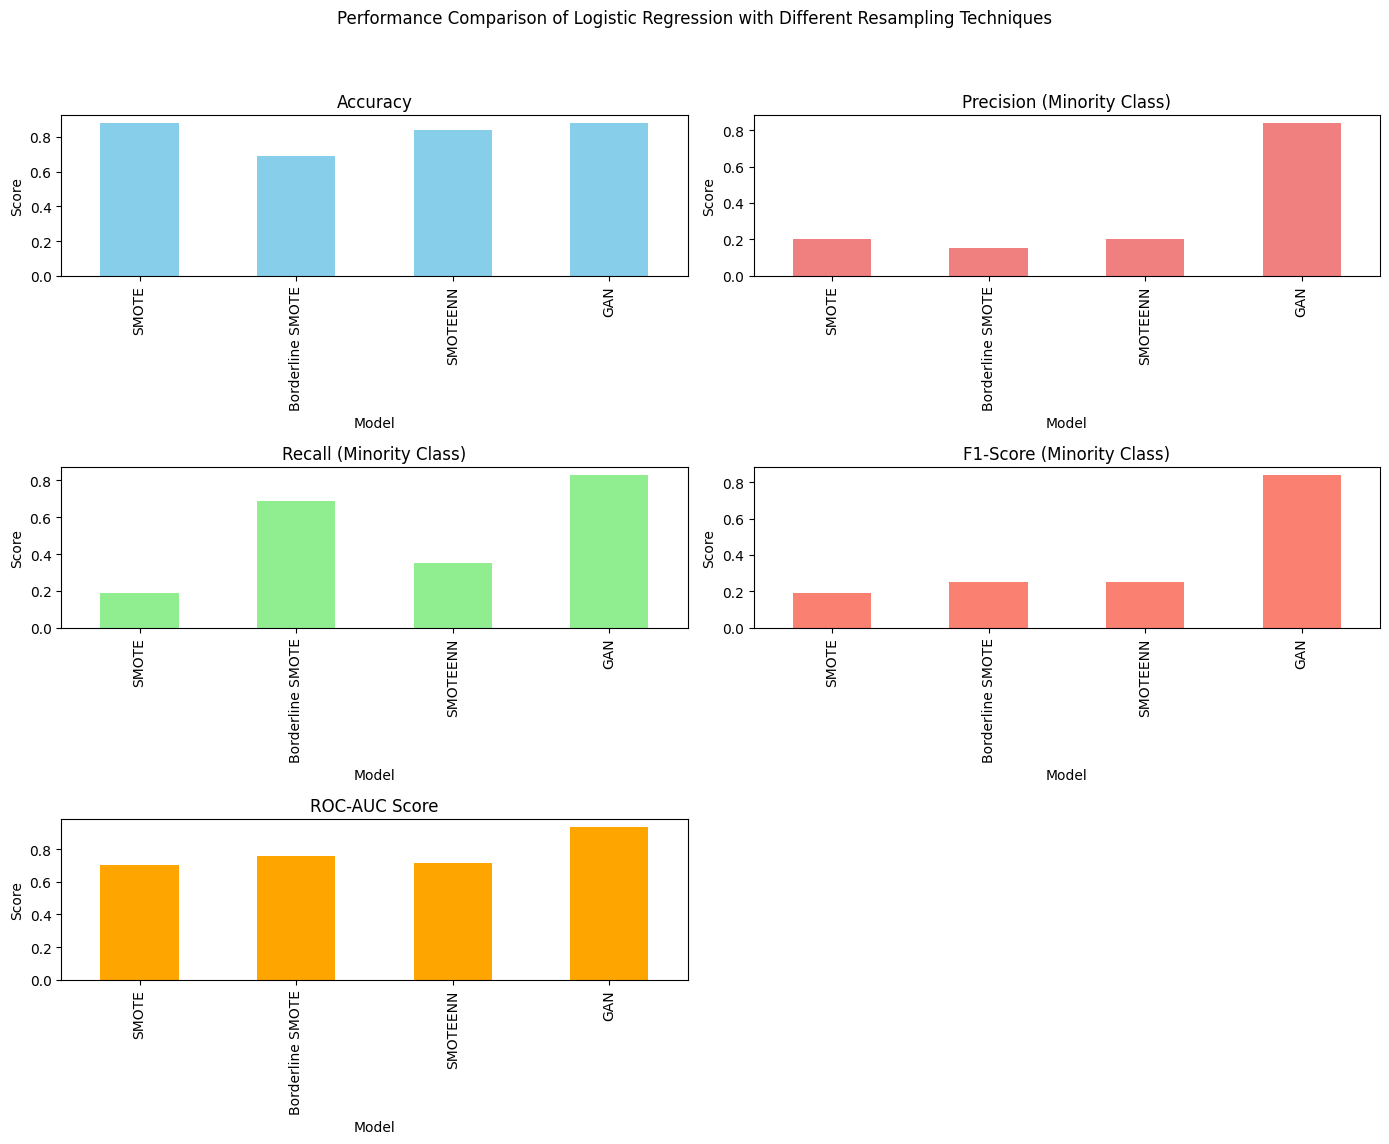

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Organize metrics for each model
data = {
    'Model': ['SMOTE', 'Borderline SMOTE', 'SMOTEENN', 'GAN'],
    'Accuracy': [0.88, 0.69, 0.84, 0.88],
    'Precision (Minority)': [0.20, 0.15, 0.20, 0.84],
    'Recall (Minority)': [0.19, 0.69, 0.35, 0.83],
    'F1-Score (Minority)': [0.19, 0.25, 0.25, 0.84],
    'ROC-AUC': [0.703, 0.758, 0.718, 0.936]
}

# Create DataFrame
metrics_df = pd.DataFrame(data)
metrics_df.set_index('Model', inplace=True)

# Plotting Accuracy, Precision, Recall, F1-Score, and ROC-AUC Score in separate subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Performance Comparison of Logistic Regression with Different Resampling Techniques")

# Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylabel("Score")

# Precision (Minority)
metrics_df['Precision (Minority)'].plot(kind='bar', ax=axes[0, 1], color='lightcoral', legend=False)
axes[0, 1].set_title("Precision (Minority Class)")
axes[0, 1].set_ylabel("Score")

# Recall (Minority)
metrics_df['Recall (Minority)'].plot(kind='bar', ax=axes[1, 0], color='lightgreen', legend=False)
axes[1, 0].set_title("Recall (Minority Class)")
axes[1, 0].set_ylabel("Score")

# F1-Score (Minority)
metrics_df['F1-Score (Minority)'].plot(kind='bar', ax=axes[1, 1], color='salmon', legend=False)
axes[1, 1].set_title("F1-Score (Minority Class)")
axes[1, 1].set_ylabel("Score")

# ROC-AUC
metrics_df['ROC-AUC'].plot(kind='bar', ax=axes[2, 0], color='orange', legend=False)
axes[2, 0].set_title("ROC-AUC Score")
axes[2, 0].set_ylabel("Score")

# Hide empty subplot
axes[2, 1].axis("off")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


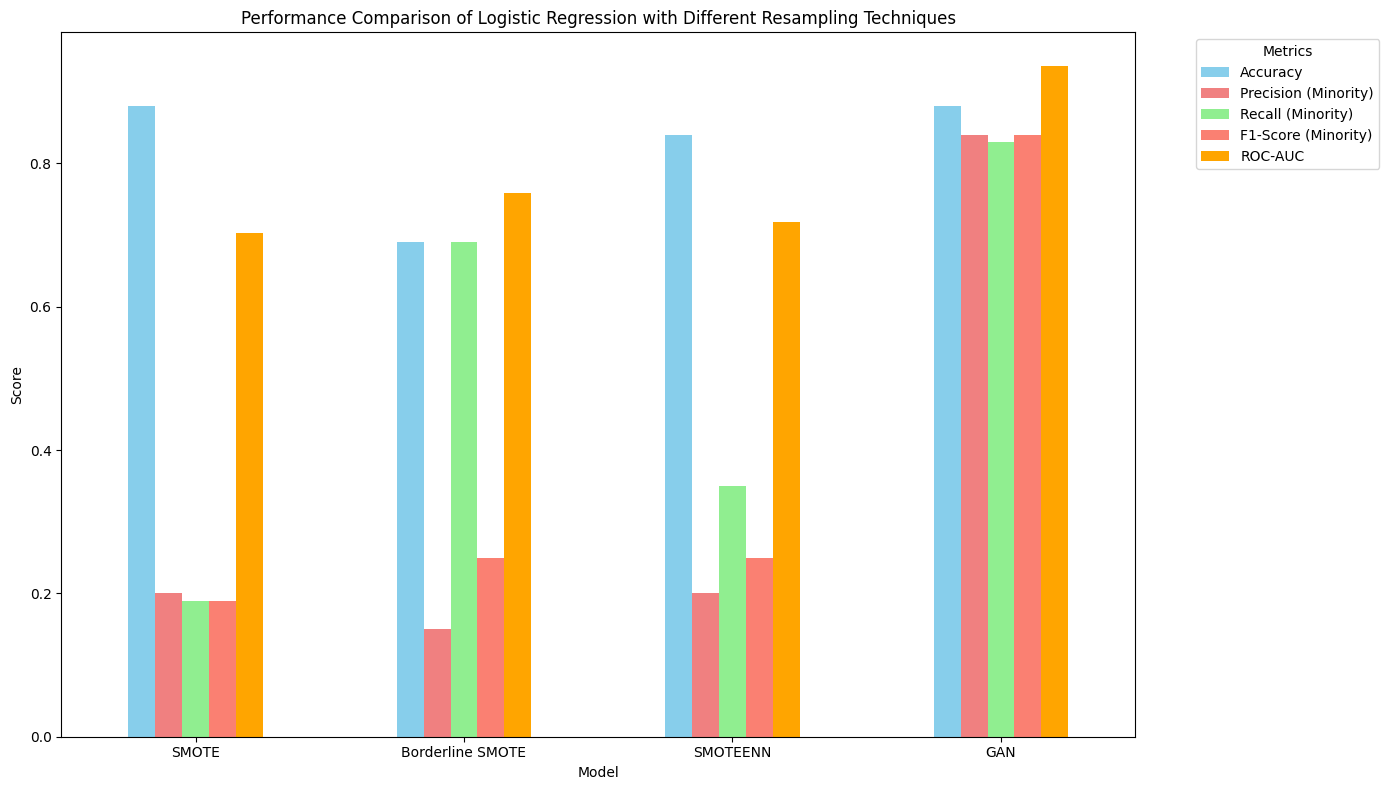

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Organize metrics for each model
data = {
    'Model': ['SMOTE', 'Borderline SMOTE', 'SMOTEENN', 'GAN'],
    'Accuracy': [0.88, 0.69, 0.84, 0.88],
    'Precision (Minority)': [0.20, 0.15, 0.20, 0.84],
    'Recall (Minority)': [0.19, 0.69, 0.35, 0.83],
    'F1-Score (Minority)': [0.19, 0.25, 0.25, 0.84],
    'ROC-AUC': [0.703, 0.758, 0.718, 0.936]
}

# Create DataFrame
metrics_df = pd.DataFrame(data)
metrics_df.set_index('Model', inplace=True)

# Plotting all metrics in a single grouped bar chart
metrics_df.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightcoral', 'lightgreen', 'salmon', 'orange'])
plt.title("Performance Comparison of Logistic Regression with Different Resampling Techniques")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
